# Challenge - Multiclass Confusion Matrix 💈

<img src="https://resi.ze-robot.com/dl/to/tokyo-night-2-1366%C3%97768.jpg">


Photo by [Benjamin Hung](https://unsplash.com/@benjaminhung)

---

Now, we will play with Iris dataset again, that has a total of 3 classes. Let's explore those results with our new tool: the confusion matrix.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

np.random.seed(0)
iris = load_iris()
X, y, target_names = iris["data"], iris["target"], iris["target_names"]

**Q1**. Split your data into a training set of 80% of the data and a test set of 20%. Specify the `random_state` to 0 so that you get **reproducible** results.

In [7]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# TODO: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

**Q2**. Fit a Logistic Regression on your data, using the parameter `solver="liblinear"`. Evaluate accuracy.

In [4]:
# TODO: Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

**Q3**. Now we want to understand better the performance than just the global accuracy. Explore the function `confusion_matrix` of scikit_learn, and use it to display the confusion matrix of your model.

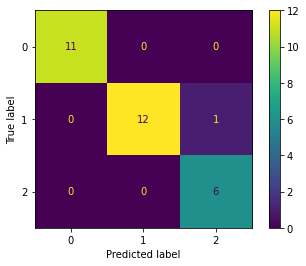

In [9]:
# TODO: Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logr, X_test, y_test)

**Q4**. Before analyzing it. Let's visualize it more properly (with color, axes label etc.).

- Display the confusion matrix in a more visual way with seaborn library
- Verify that your axes are correct by comparing some values of the matrix with real values

**Q5**. Compute by hand Precision, Recall and F1_score

In [15]:
# TODO: Classification metrics
from statistics import mean
prc_0 = 11/11
prc_1 = 12/12
prc_2 = 6/7
precision = mean([prc_0, prc_1, prc_2])
rcl_0 = 11/11
rcl_1 = 12/13
rcl_2 = 6/6
recall = mean([rcl_0, rcl_1, rcl_2])
f1_score = (2 * precision * recall)/(precision + recall)

In [21]:
prc_0, prc_1, prc_2

(1.0, 1.0, 0.8571428571428571)

In [22]:
rcl_0, rcl_1, rcl_2

(1.0, 0.9230769230769231, 1.0)

In [20]:
print(f'Precision: {precision}\nRecall: {recall}\nF1-Score: {f1_score}')

Precision: 0.9523809523809523
Recall: 0.9743589743589743
F1-Score: 0.9632446134347276


**Q6**. Again, there is a built-in function in scikit-learn in order to compute those scores easily.

It is called `classification_report`. Use it and compare with your previous numbers.

In [19]:
# TODO: classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Results are exactly the same.

**Q7**. How would you analyze your model performance?

Model performance is very good on this dataset, even if it could have been better to observe results on a more balanced test set (here the class 2 is less represented than others by half).